<a href="https://colab.research.google.com/github/dilip-ksa/dilip_ml_pythondemo/blob/main/Day33_ML_Journey_MachineLearning_Project_Day1_17DEC25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('income.csv')

In [ ]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


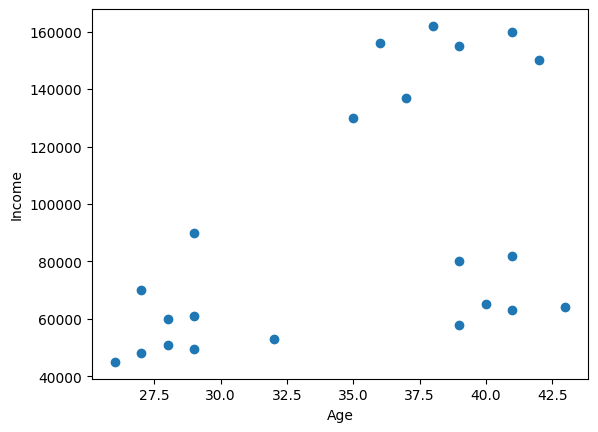

In [ ]:
# plot scatter plot of cluster data
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
print(y_predicted)

[0 0 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 0 0 2]


In [ ]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [ ]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [ ]:
df1 = df[df.cluster==0]
df1
df2 = df[df.cluster==1]
df2
df3 = df[df.cluster==2]
df3

,Name,Age,Income($),cluster
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2
14,Stark,29,49500,2
15,Ranbir,32,53000,2
16,Dipika,40,65000,2
17,Priyanka,41,63000,2
18,Nick,43,64000,2


/tmp/ipython-input-2089116791.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


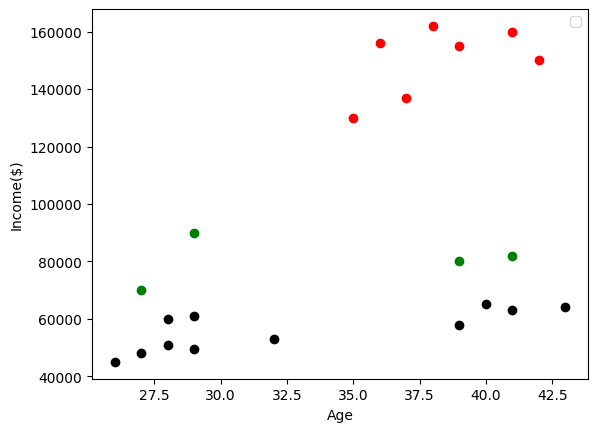

In [ ]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
#plt.show()
plt.legend()

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


Text(0, 0.5, 'Income')

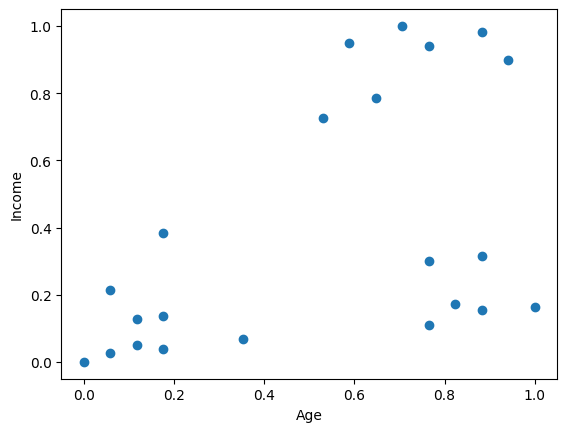

In [ ]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
print(y_predicted)

[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


In [ ]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
df1 = df[df.cluster==0]
df1
df2 = df[df.cluster==1]
df2
df3 = df[df.cluster==2]
df3

,Name,Age,Income($),cluster
16,Dipika,0.823529,0.170940,2
17,Priyanka,0.882353,0.153846,2
18,Nick,1.000000,0.162393,2
19,Alia,0.764706,0.299145,2
20,Sid,0.882353,0.316239,2
21,Abdul,0.764706,0.111111,2


/tmp/ipython-input-3361852791.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


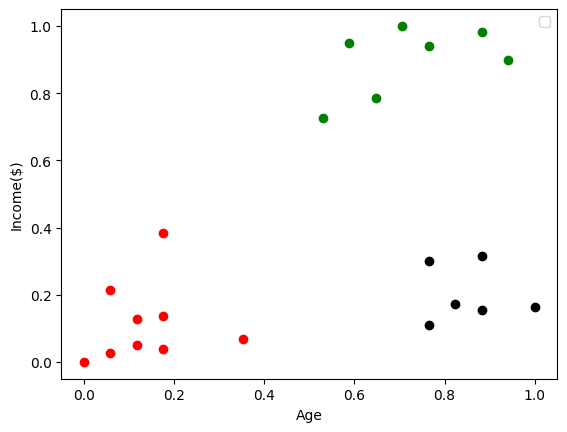

In [ ]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
# ELbow method clustering
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

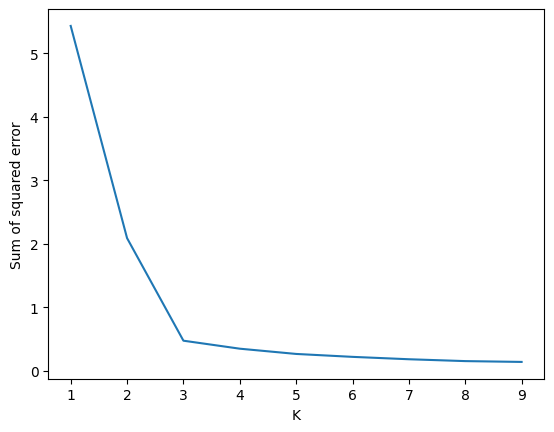

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [ ]:
##################### Unsupervised training day 2 ################################
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Math':    [88, 78, 95, 60, 55, 62, 80, 90, 58, 85],
    'Science': [92, 85, 96, 65, 58, 60, 83, 91, 59, 87]
}

In [ ]:
df = pd.DataFrame(data)
df.head()

,Student,Math,Science
0,A,88,92
1,B,78,85
2,C,95,96
3,D,60,65
4,E,55,58


In [ ]:
x = df[['Math', 'Science']]

In [ ]:
# KMeans++ algorithm
model = KMeans(n_clusters=2, init='k-means++', random_state=42)
df['cluster'] = model.fit_predict(x)
df

,Student,Math,Science,cluster
0,A,88,92,1
1,B,78,85,1
2,C,95,96,1
3,D,60,65,0
4,E,55,58,0
5,F,62,60,0
6,G,80,83,1
7,H,90,91,1
8,I,58,59,0
9,J,85,87,1


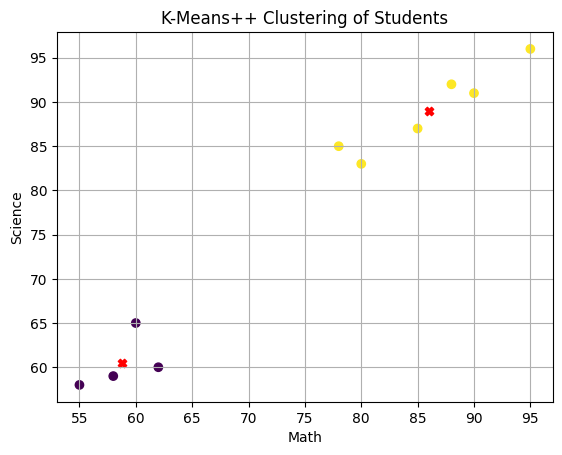

In [ ]:
plt.scatter(df['Math'], df['Science'], c=df['cluster'], cmap='viridis')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='red', marker= 'X')
plt.xlabel('Math')
plt.ylabel('Science')
plt.title('K-Means++ Clustering of Students')
plt.grid(True)
plt.show()

In [ ]:
# No of iteration by algorithm
print('KMeans++ irerations', model.n_iter_)

KMeans++ irerations 2


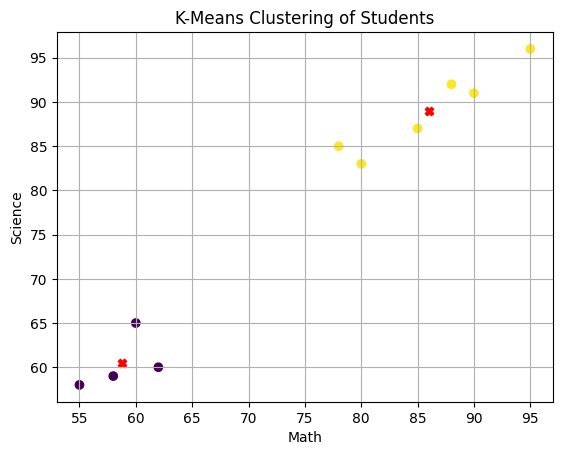

In [ ]:
# With KMeans algorithm
model1 = KMeans(n_clusters=2, random_state=42)
df['cluster'] = model1.fit_predict(x)

plt.scatter(df['Math'], df['Science'], c=df['cluster'], cmap='viridis')
plt.scatter(model1.cluster_centers_[:,0], model1.cluster_centers_[:,1], color='red', marker= 'X')
plt.xlabel('Math')
plt.ylabel('Science')
plt.title('K-Means Clustering of Students')
plt.grid(True)
plt.show()

In [ ]:
# No of iteration by algorithm
print('KMeans irerations', model1.n_iter_)

KMeans irerations 2


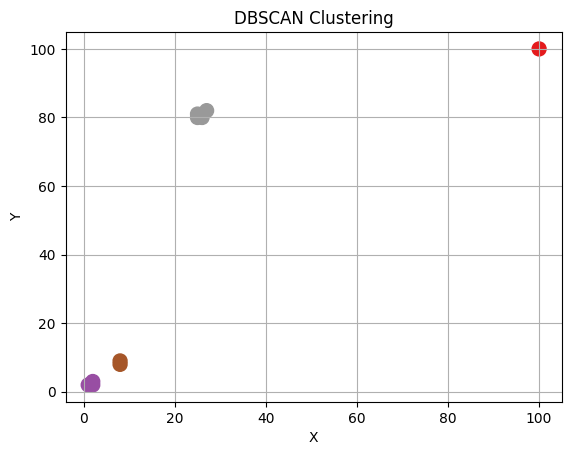

In [ ]:
# DB scan clustering algorithm
# Sample dataset
data = {
    'X': [1, 2, 2, 8, 8, 25, 25, 26, 27, 100],
    'Y': [2, 2, 3, 8, 9, 80, 81, 80, 82, 100]
}
df = pd.DataFrame(data)

# Apply DBSCAN
model = DBSCAN(eps=3, min_samples=2)
df['Cluster'] = model.fit_predict(df[['X', 'Y']])

# Plot
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='Set1', s=100)
plt.title("DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()